### Houserent prediction model

## Background and problem

In recent moments, it has been a hassle to find a house within you budget and preferences

The cost of house rent depends on many factors such as; the house size, number of bedrooms, locality, number of bathrooms, halls, and kitchen, furnishing status, and a lot more. With the use of appropriate machine learning algorithms, real estate owners can find the ideal house according to customers’ budgets and preferences with ease.

## Objectives

The goal of this project is to:


1. Implement a machine learning model with predicting the house rent for houses.
2. Determine the essential features significantly needed to predict the house rent for homes.

## Steps followed

The basic procedures implemented to achieve the goals of this research are:

1. Data collection

2. Data cleaning and exploration

3. Feature encoding

4. Train-test split validation

5. Feature scaling

6. Modeling

7. Model evaluation


## Data collection.

The dataset used in this project was obtained from [Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset). It has information on about 4700+ houses available for rent with different parameters ranging from; size to the number of bedrooms, halls, and kitchens to the locality, and furnishing status, among others.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
model_data=pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
model_data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## Data cleaning and Exploration.

On Exploration, it was noted that there are no duplicates neither are there any null values hence the data is clean to contine with the subsequent steps.

In [3]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
model_data.shape

(4746, 12)

In [5]:
model_data.duplicated().sum()

0

In [6]:
model_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Going further, I explored if there is/not trends/relationship between the explanatory variables vs the target variable

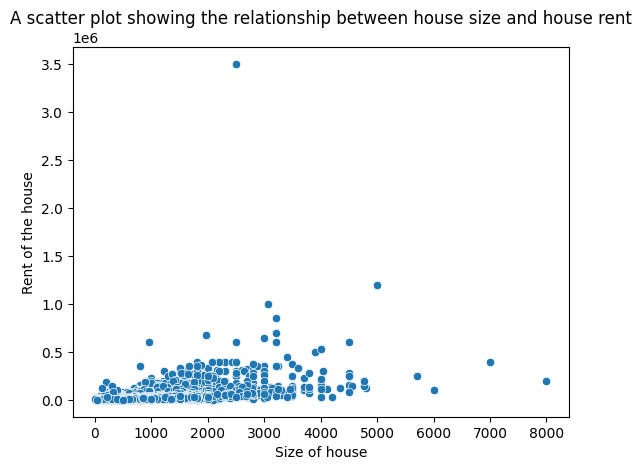

In [7]:
sns.scatterplot(x="Size",y="Rent",data=model_data)
plt.title("A scatter plot showing the relationship between house size and house rent")
plt.xlabel("Size of house")
plt.ylabel("Rent of the house")
plt.show()

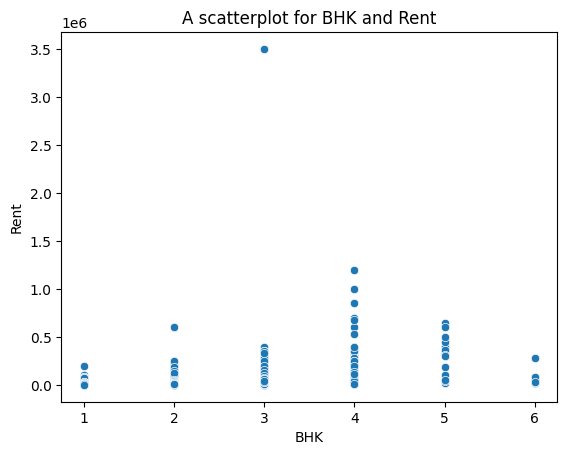

In [8]:
sns.scatterplot(x="BHK", y="Rent",data=model_data)
plt.title("A scatterplot for BHK and Rent")
plt.show()

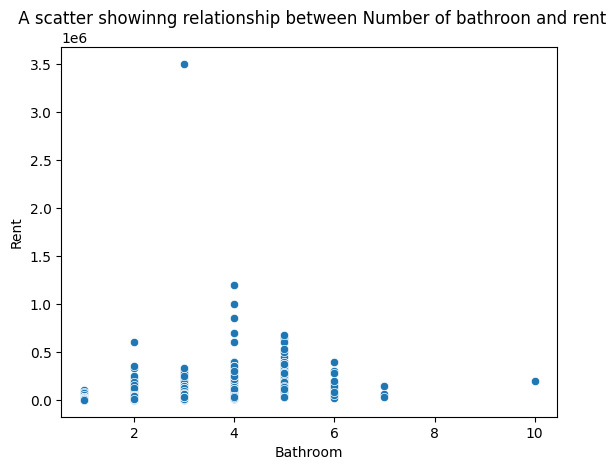

In [9]:
sns.scatterplot(x="Bathroom", y="Rent",data=model_data)
plt.title(" A scatter showinng relationship between Number of bathroon and rent")
plt.show()

I noticed there are extremely high values of target variable (Rent) however i decided not to remove it as there can be extremely high rents.

On checking data types, most of the explanatory factors (columns) are categorical in nature this leads to next step **Feature Encoding**

### Feature Encoding

The categorical features have to be converted to numerical features for efficient modeling.

Further examination shows that the categorical features have pretty much labels, therefore using one hot encoding will likely lead to high dimensionality. Therefore, Scikit-learn’s label encoder was used to encode the features.

In [10]:
cat_columns = model_data.select_dtypes(include=['object', 'category']).columns
categorical_subset = model_data[cat_columns]
categorical_subset.head()

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner


In [11]:
lab=LabelEncoder()
for x in categorical_subset:
    model_data[x]=lab.fit_transform(model_data[x])
    

In [12]:
model_data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,455,2,221,4,2,1,2,2
1,21,2,20000,800,14,2,1527,4,1,1,1,2
2,24,2,17000,1000,14,2,1760,4,1,1,1,2
3,73,2,10000,800,10,2,526,4,2,1,1,2
4,17,2,7500,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,26,2,15000,1000,271,1,219,3,1,1,2,2
4742,23,3,29000,2000,16,2,1214,3,1,1,3,2
4743,79,3,35000,1750,271,1,724,3,1,1,3,0
4744,75,3,45000,1500,226,1,590,3,1,2,2,0


After feature encoding i used a heatmap too visualize correlation of the features.

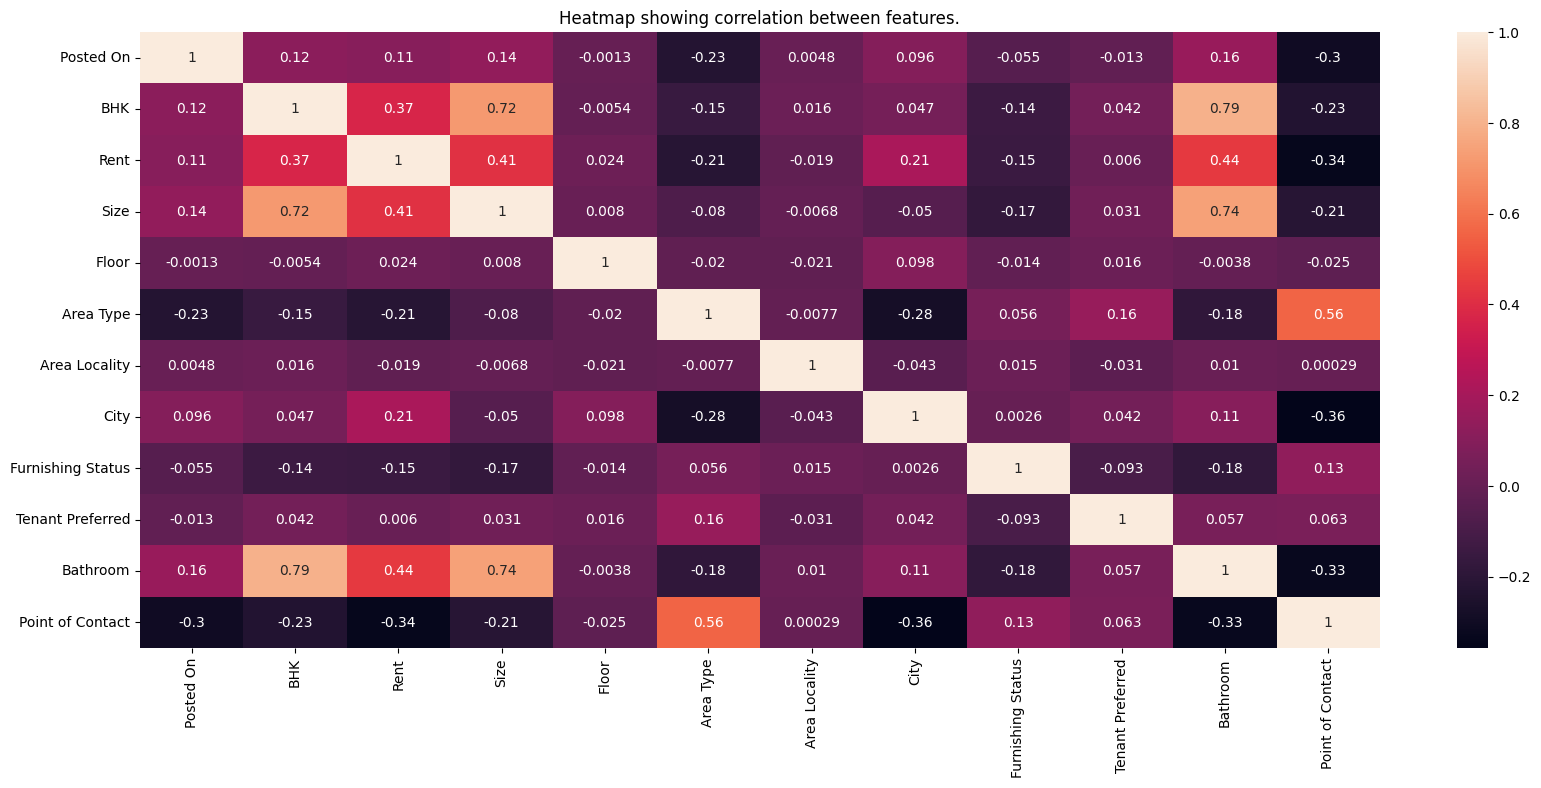

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(model_data.corr(), annot=True)
plt.title("Heatmap showing correlation between features.")
plt.show()

### Train-test split validation

The dataset is split into explanatory variables — X and target variable — y. 

Then, further, split into train and test data in ratio 80:20 respectively.

Splitting the data helps to assess the model’s performance on unseen data after being trained on the training data. Scikit-learn’s train-test split is used to accomplish this task.

In [14]:
x=model_data.drop(["Posted On","Rent"],axis=1).values

In [15]:
y=model_data["Rent"].values

In [16]:
x.shape

(4746, 10)

In [17]:
y.shape

(4746,)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

### Feature Scaling

Before going into modeling proper, the data needs to be scaled to handle skewed features. 

Scikit-learn’s standard scaler ensures that for each feature the mean is 0 and the variance is 1, bringing all the features to the same magnitude. 

Doing this will significantly affect the model’s performance.

In [19]:
scaler = StandardScaler()
Scaled_xtrain=scaler.fit_transform(x_train)
Scaled_xtest = scaler.transform(x_test)

# Modelling


## 1. Linear Regression.

House rent prediction is a regression problem, therefore about five regression models were trained and the best was chosen.

Before training Evaluation metrics were defined and stored- R2 score and root mean squared error.

In [20]:
def RootRSE(ytest,ypred):
    result = np.sqrt(mean_squared_error(ytest,ypred))
    return result

In [21]:
 def R2Score(model):
     score = model.score(Scaled_xtest, y_test)
     return score

In [22]:
LinearModel = LinearRegression()
LinearModel.fit(Scaled_xtrain,y_train)

LinearRegression()

In [23]:
Rent_LinearModel = LinearModel.predict(Scaled_xtest)

In [24]:
R_Squared = R2Score(LinearModel)
print("The R squared value of model is " + str(R_Squared)  )

The R squared value of model is 0.4593449152469078


In [25]:
RMSE = RootRSE(y_test, Rent_LinearModel)
print("The RMSE value is "+ str(RMSE))


The RMSE value is 46418.92581490508


## 2. Decision Tree Model.

In [26]:
TreeModel = DecisionTreeRegressor(min_samples_split=30, max_depth = 10)
TreeModel.fit(Scaled_xtrain,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=30)

In [27]:
Rent_Tree = TreeModel.predict(Scaled_xtest)

In [28]:
R2 = R2Score(TreeModel)
print(" The coefficient of determination for this model is " + str(R2))


 The coefficient of determination for this model is 0.6702562974709894


In [29]:
RMSE2 = RootRSE(y_test, Rent_Tree)
print("The Square root of MSE is " +str(RMSE2) )

The Square root of MSE is 36251.267447009806


## 3. XGboost model

In [30]:
from xgboost import XGBRegressor
xgbModel = XGBRegressor(max_depth = 3, n_jobs=-1)
xgbModel.fit(Scaled_xtrain, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
RentPredxgb = xgbModel.predict(Scaled_xtest)

In [32]:
R3 = R2Score(xgbModel)
print(" The coefficient of determination for this model is " + str(R3))

 The coefficient of determination for this model is 0.5631245186864029


In [33]:
RMSE3 = RootRSE(y_test, RentPredxgb)
print("The Square root of MSE is " +str(RMSE3) )

The Square root of MSE is 41726.674695669855


## 4. Gradient Boost Model

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
BoostingModel = GradientBoostingRegressor(n_estimators = 300, min_samples_split=20)
BoostingModel.fit(Scaled_xtrain,y_train)



GradientBoostingRegressor(min_samples_split=20, n_estimators=300)

In [35]:
RentPredBoost = BoostingModel.predict(Scaled_xtest)

In [36]:
R4 = R2Score(BoostingModel)
print(" The coefficient of determination for this model is " + str(R4))

 The coefficient of determination for this model is 0.6641974342017753


In [37]:
MSE = RootRSE(y_test, RentPredBoost)
print(" The RMSE for this model is " + str(MSE))

 The RMSE for this model is 36582.80022074671


## 5. Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
ForestModel = RandomForestRegressor(n_estimators =300, max_depth = 10, min_samples_split = 30, n_jobs = -1, random_state = 0)
ForestModel.fit(Scaled_xtrain,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=30, n_estimators=300,
                      n_jobs=-1, random_state=0)

In [39]:
RentPredForest = ForestModel.predict(Scaled_xtest)

In [40]:
R5 = R2Score(ForestModel)
print(" The coefficient of determination for this model is " + str(R5))

 The coefficient of determination for this model is 0.7183358884934666


In [41]:
R = RootRSE(y_test, RentPredForest)
print(" The RMSE for this model is " + str(R))

 The RMSE for this model is 33504.31147951446


## Model evaluation

After five models have been trained on the training data, we can see that **the random forest model** has proven to be the best model having the best R2 score of 0.71 and the least RMSE of approximately 33504

## Feature Importance

The i finalised by evaluating which feature or explantory variables are important in determining house rent.

feature: 0,feature: 0.00410
feature: 1,feature: 0.38702
feature: 2,feature: 0.00852
feature: 3,feature: 0.00062
feature: 4,feature: 0.01321
feature: 5,feature: 0.19138
feature: 6,feature: 0.00284
feature: 7,feature: 0.00131
feature: 8,feature: 0.34650
feature: 9,feature: 0.04450


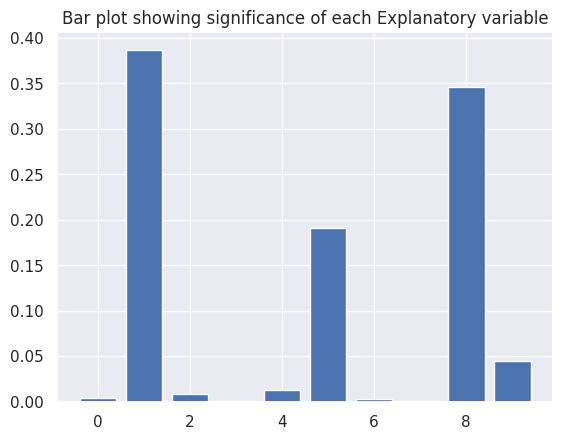

In [42]:
Important_feature = ForestModel.feature_importances_
for i, v in enumerate (Important_feature):
    print("feature: %d,feature: %.5f" %(i, v))

sns.set()
plt.bar([x for x in range (len(Important_feature))],Important_feature)
plt.title("Bar plot showing significance of each Explanatory variable")
plt.show()